In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/door-dash/datasets/historical_data.csv


In [2]:
ddash = pd.read_csv('/kaggle/input/door-dash/datasets/historical_data.csv')

In [3]:
ddash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [4]:
ddash.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [5]:
ddash[ddash.duplicated(keep=False)]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration


In [6]:
ddash.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [7]:
threshold = int(len(ddash) * 0.05)
print(threshold)

9871


In [8]:
cols_to_drop = ddash.columns[ddash.isna().sum() <= threshold]
print(cols_to_drop)

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')


In [9]:
ddash.dropna(subset=cols_to_drop, inplace=True)

In [10]:
cols_with_missing_values = ddash.columns[ddash.isna().sum()>0]
print(cols_with_missing_values)

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')


In [11]:
ddash['created_at'] = pd.to_datetime(ddash['created_at'])
ddash['actual_delivery_time'] = pd.to_datetime(ddash['actual_delivery_time'])

ddash['actual_total_delivery_duration'] = (ddash['actual_delivery_time'] - ddash['created_at']).dt.seconds

In [12]:
ddash['actual_total_delivery_duration'] = (ddash['actual_delivery_time'] - ddash['created_at']).dt.total_seconds()

In [13]:
store_category_wait_times_mean = ddash.groupby('store_primary_category')['actual_total_delivery_duration'].mean().sort_values(ascending=False)

In [14]:
store_category_wait_times_mean / 60

store_primary_category
italian        70.329332
spanish        56.178378
caribbean      56.111111
brazilian      55.724405
belgian        54.991667
                 ...    
fast           43.852149
gluten-free    42.028495
kosher         41.576144
indonesian     40.750000
chocolate      34.133333
Name: actual_total_delivery_duration, Length: 74, dtype: float64

In [15]:
ddash.groupby('store_primary_category')['estimated_store_to_consumer_driving_duration'].mean().sort_values(ascending=False) / 60

store_primary_category
alcohol-plus-food    13.183333
indonesian           10.908333
soup                 10.494369
caribbean            10.302579
malaysian            10.119865
                       ...    
gastropub             7.942391
european              7.834091
tapas                 7.010532
moroccan              6.884000
convenience-store     6.733189
Name: estimated_store_to_consumer_driving_duration, Length: 74, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


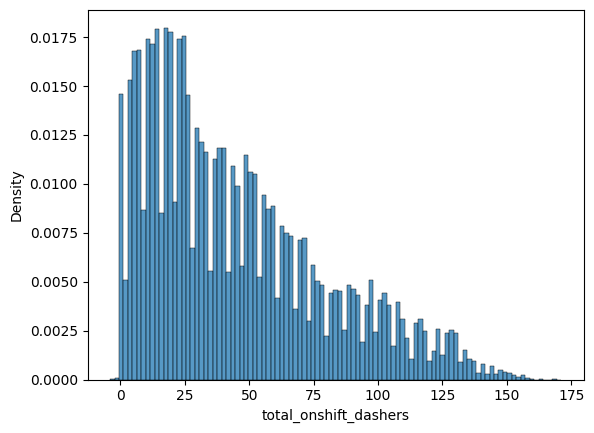

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


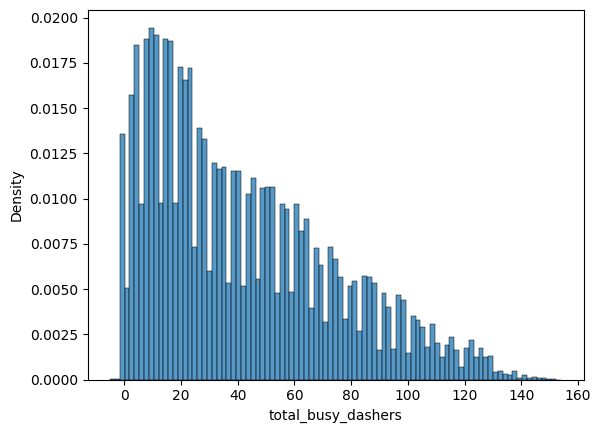

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


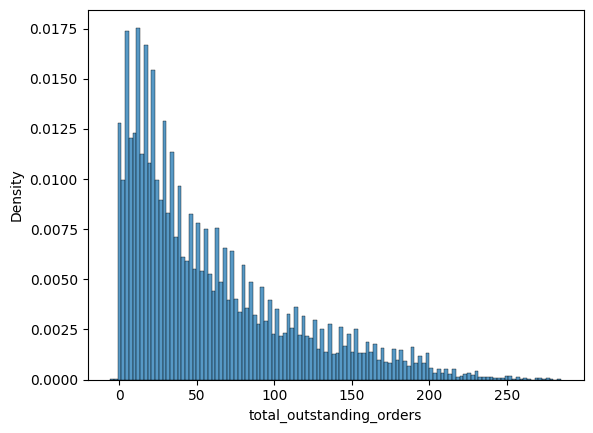

In [16]:
for col in cols_with_missing_values:
    sns.histplot(data=ddash, x=col, stat='density')
    plt.show()

In [17]:
cols_with_missing_values

Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')

In [18]:
ddash['total_onshift_dashers'].median()

37.0

In [19]:
ddash[cols_with_missing_values].astype(float)

,total_onshift_dashers,total_busy_dashers,total_outstanding_orders
0,33.0,14.0,21.0
1,1.0,2.0,2.0
8,8.0,6.0,18.0
14,5.0,6.0,8.0
15,5.0,5.0,7.0
...,...,...,...
197423,17.0,17.0,23.0
197424,12.0,11.0,14.0
197425,39.0,41.0,40.0
197426,7.0,7.0,12.0


In [20]:
nan_check = ddash[ddash['total_onshift_dashers'].isnull()]['total_onshift_dashers']

In [21]:
nan_check

160      NaN
161      NaN
162      NaN
163      NaN
164      NaN
          ..
197196   NaN
197197   NaN
197198   NaN
197199   NaN
197421   NaN
Name: total_onshift_dashers, Length: 15630, dtype: float64

In [35]:
ddash['total_onshift_dashers'].iloc[139]

37.0

In [52]:
for col in cols_with_missing_values:
    print(ddash[col].median())

37.0
35.0
41.0


In [45]:
for col in cols_with_missing_values:
    ddash[col] = ddash[col].fillna(ddash[col].mean())

In [46]:
ddash['total_onshift_dashers'].iloc[160]

34.0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


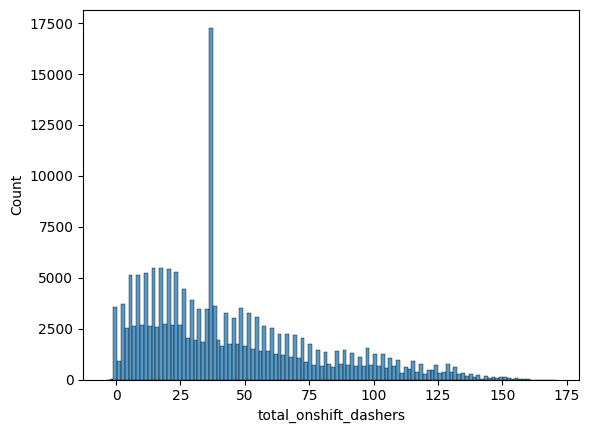

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


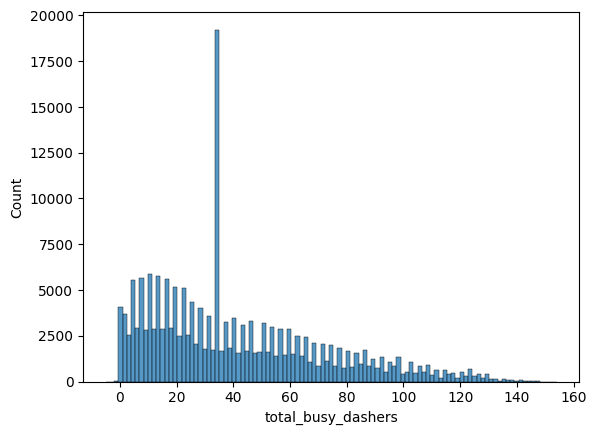

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


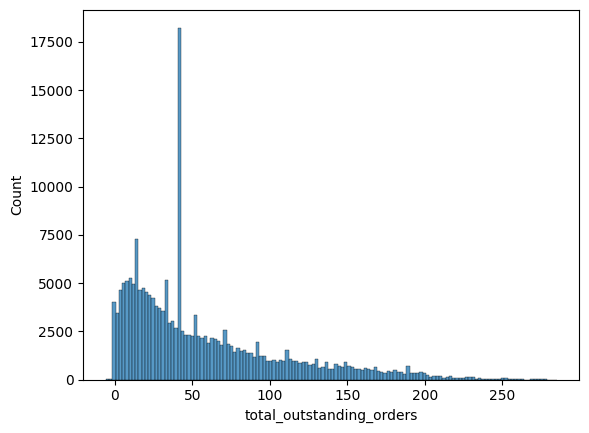

In [47]:
for col in cols_with_missing_values:
    sns.histplot(data=ddash, x=col)
    plt.show()

In [38]:
ddash['total_onshift_dashers'].isna().sum()

0

In [ ]:
ddash['actual_total_delivery_duration']

In [ ]:
ddash['total_busy_dashers']

In [ ]:
ddash['total_onshift_dashers']

In [ ]:
ddash['busy_dashers_ratio'] = ddash['total_busy_dashers'] / ddash['total_onshift_dashers']

In [ ]:
ddash['busy_dashers_ratio']